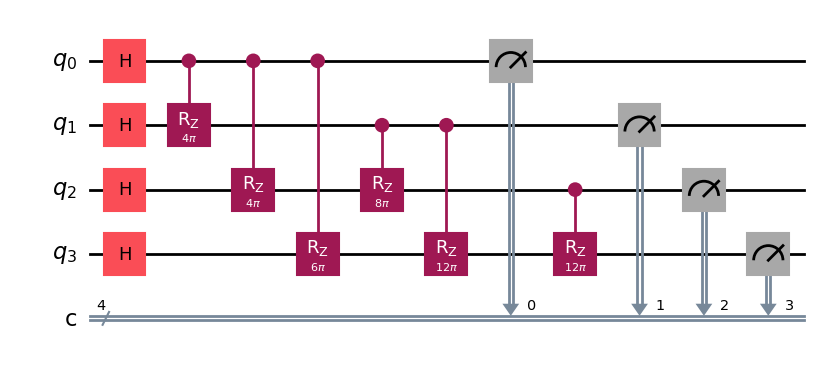

In [84]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
import numpy as np

# Create a quantum register with 4 qubits and a classical register with 4 bits
qr = QuantumRegister(4, 'q')
cr = ClassicalRegister(4, 'c')
qc = QuantumCircuit(qr, cr)

# Apply Hadamard gates to all qubits
for i in range(4):
    qc.h(qr[i])

# Apply controlled-phase gates
qc.crz(4.0 * np.pi, qr[0], qr[1])
qc.crz(4.0 * np.pi, qr[0], qr[2])
qc.crz(6.0 * np.pi, qr[0], qr[3])
qc.crz(8.0 * np.pi, qr[1], qr[2])
qc.crz(12.0 * np.pi, qr[1], qr[3])
qc.crz(12.0 * np.pi, qr[2], qr[3])

# Measure each qubit into the corresponding classical bit
qc.measure(qr, cr)

# Draw the circuit
qc.draw(output='mpl', style='iqp')


{'0010': 75, '1001': 176, '0110': 177, '1100': 40, '1011': 83, '1010': 48, '0111': 53, '1110': 65, '1101': 67, '0001': 58, '0011': 41, '0101': 27, '0100': 60, '1000': 48, '1111': 4, '0000': 2}


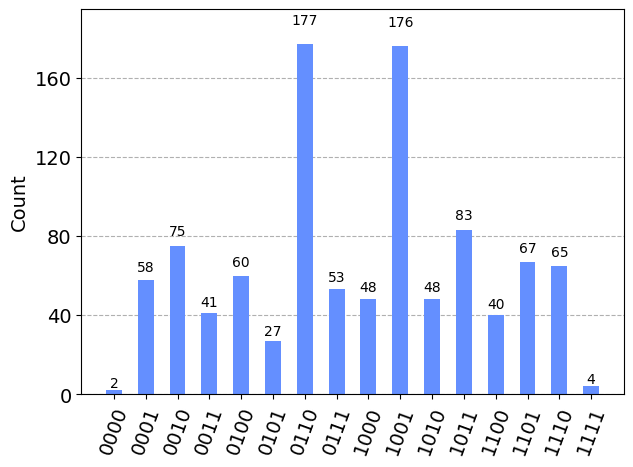

In [166]:
simulator = BasicSimulator()

# Simulate the circuit
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts()

# Print the counts
print(result.get_counts())

# Plot the histogram
plot_histogram(result.get_counts())

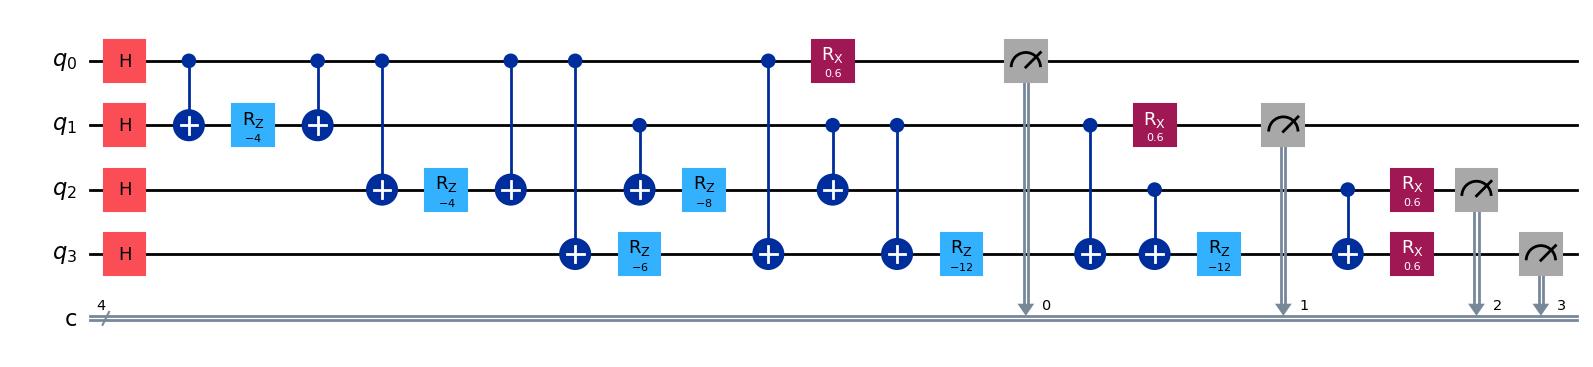

In [82]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# Define parameters
gamma = 0.5   # Cost unitary parameter
beta  = 0.3   # Mixing unitary parameter
n_qubits = 4  # Four spins / qubits

# Create a QuantumCircuit with 4 qubits and 4 classical bits
qc = QuantumCircuit(n_qubits, n_qubits)

# === STEP 1: Prepare a uniform superposition ===
# Apply Hadamard gate to each qubit.
for i in range(n_qubits):
    qc.h(i)

# === STEP 2: Apply the Cost Unitary U_C(gamma) ===
# Our cost Hamiltonian (dropping the constant term) is:
# H_C = 4 Z0 Z1 + 4 Z0 Z2 + 6 Z0 Z3 + 8 Z1 Z2 + 12 Z1 Z3 + 12 Z2 Z3
#
# For each two-qubit ZZ term we implement:
#   CX, Rz(2 * gamma * coefficient) on target, CX.
#

# --- Term 1: 4 Z0 Z1 ---
qc.cx(0, 1)
qc.rz(-2 * gamma * 4, 1)  # note the negative sign: -2*0.5*4 = -4.0 radians
qc.cx(0, 1)

# --- Term 2: 4 Z0 Z2 ---
qc.cx(0, 2)
qc.rz(-2 * gamma * 4, 2)  # angle: -4.0 radians
qc.cx(0, 2)

# --- Term 3: 6 Z0 Z3 ---
qc.cx(0, 3)
qc.rz(-2 * gamma * 6, 3)  # angle: -6.0 radians
qc.cx(0, 3)

# --- Term 4: 8 Z1 Z2 ---
qc.cx(1, 2)
qc.rz(-2 * gamma * 8, 2)  # angle: -8.0 radians
qc.cx(1, 2)

# --- Term 5: 12 Z1 Z3 ---
qc.cx(1, 3)
qc.rz(-2 * gamma * 12, 3)  # angle: -12.0 radians
qc.cx(1, 3)

# --- Term 6: 12 Z2 Z3 ---
qc.cx(2, 3)
qc.rz(-2 * gamma * 12, 3)  # angle: -12.0 radians
qc.cx(2, 3)

# -------------------------------
# Step 3: Apply the Mixing Unitary U_M(beta)
# -------------------------------
# For each qubit, apply Rx(2*beta). (Note: Rx(θ) = exp(-i θ X/2))
for i in range(n_qubits):
    qc.rx(2 * beta, i)

# === STEP 4: Measurement ===
qc.measure(range(n_qubits), range(n_qubits))

# Draw the circuit
qc.draw(output='mpl', style='iqp')


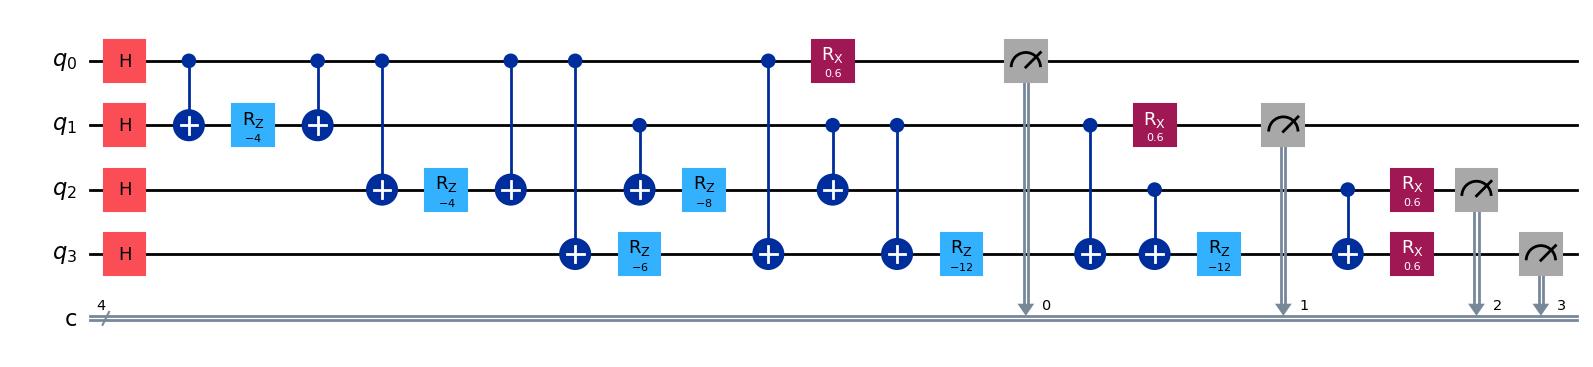

In [106]:
# Number of qubits (for the four numbers in [1,2,2,3])
n_qubits = 4

# Create a quantum circuit with 4 qubits and 4 classical bits.
qc = QuantumCircuit(n_qubits, n_qubits)

# =======================
# Step 1: Initialization
# =======================
# Apply Hadamard gates to prepare a uniform superposition.
for i in range(n_qubits):
    qc.h(i)

# =======================
# Step 2: Cost Unitary U_C(γ)
# =======================
# We drop the one-body (constant) terms since they only add a global phase.
# The two-body part of the effective Hamiltonian is:
#   4 s1 s2 + 4 s1 s3 + 6 s1 s4 + 8 s2 s3 + 12 s2 s4 + 12 s3 s4.
# Using γ = 0.5, each term is implemented as:
#   CX, Rz(-2 * γ * coefficient) on target, CX.

# Term between qubits 0 and 1 (s1 s2, coefficient 4 -> angle = -4.0)
qc.cx(0, 1)
qc.rz(-4.0, 1)
qc.cx(0, 1)

# Term between qubits 0 and 2 (s1 s3, coefficient 4 -> angle = -4.0)
qc.cx(0, 2)
qc.rz(-4.0, 2)
qc.cx(0, 2)

# Term between qubits 0 and 3 (s1 s4, coefficient 6 -> angle = -6.0)
qc.cx(0, 3)
qc.rz(-6.0, 3)
qc.cx(0, 3)

# Term between qubits 1 and 2 (s2 s3, coefficient 8 -> angle = -8.0)
qc.cx(1, 2)
qc.rz(-8.0, 2)
qc.cx(1, 2)

# Term between qubits 1 and 3 (s2 s4, coefficient 12 -> angle = -12.0)
qc.cx(1, 3)
qc.rz(-12.0, 3)
qc.cx(1, 3)

# Term between qubits 2 and 3 (s3 s4, coefficient 12 -> angle = -12.0)
qc.cx(2, 3)
qc.rz(-12.0, 3)
qc.cx(2, 3)

# =======================
# Step 3: Mixing Unitary U_M(β)
# =======================
# For each qubit, apply Rx(2β) with β = 0.3 so that 2β = 0.6.
for i in range(n_qubits):
    qc.rx(0.6, i)

# === STEP 4: Measurement ===
qc.measure(range(n_qubits), range(n_qubits))

# Draw the circuit
qc.draw(output='mpl', style='iqp')


In [146]:
from qiskit.circuit.library import RZGate, RZZGate
import numpy as np

# Number of qubits
n = 4  
trotter_steps = 10
T = 10.0  

# Time-dependent interpolation
def s(t):
    return t / T

# Create the circuit
qc = QuantumCircuit(n)

# Step 1: Apply Hadamard gates to prepare |+> states
qc.h(range(n))

# Step 2: Trotterized evolution
for step in range(trotter_steps):
    t = (step + 1) * (T / trotter_steps)
    s_t = s(t)
    
    # Apply RZ gates for -Z_i terms
    single_qubit_terms = [(-28, 0), (-48, 1), (-48, 2), (-36, 3)]
    for coeff, q in single_qubit_terms:
        theta = -2 * s_t * coeff * (T / trotter_steps)
        qc.rz(theta, q)

    # Apply RZZ gates for interaction terms
    zz_terms = [(0, 1, 16), (0, 2, 16), (0, 3, 24), 
                (1, 2, 32), (1, 3, 48), (2, 3, 48)]
    
    for q1, q2, coeff in zz_terms:
        theta = -2 * s_t * coeff * (T / trotter_steps)
        qc.append(RZZGate(theta), [q1, q2])
    
# Step 3: Measure qubits
qc.measure_all()
qc.draw('mpl')


In [165]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit

# Define parameters
gamma = 0.5   # Cost unitary parameter
beta  = 0.3   # Mixing unitary parameter
n_qubits = 4  # Four spins / qubits

trotter_steps = 100
T = 10.0  

# Create a QuantumCircuit with 4 qubits and 4 classical bits
qc = QuantumCircuit(n_qubits, n_qubits)

# === STEP 1: Prepare a uniform superposition ===
for i in range(n_qubits):
    qc.h(i)

# Time-dependent interpolation
def s(t):
    return t / T

# Step 2: Trotterized evolution
for step in range(trotter_steps):
    # === STEP 2: Apply the Cost Unitary U_C(gamma) ===
    # H_C = 4 Z0 Z1 + 4 Z0 Z2 + 6 Z0 Z3 + 8 Z1 Z2 + 12 Z1 Z3 + 12 Z2 Z3
    # Implement each ZZ term using Rzz.

    t = (step + 1) * (T / trotter_steps)
    s_t = s(t)
    
    qc.rzz(-2 * s_t * gamma * 4 * (T / trotter_steps), 0, 1)
    qc.rzz(-2 * s_t * gamma * 4 * (T / trotter_steps), 0, 2)
    qc.rzz(-2 * s_t * gamma * 6 * (T / trotter_steps), 0, 3)
    qc.rzz(-2 * s_t * gamma * 8 * (T / trotter_steps), 1, 2)
    qc.rzz(-2 * s_t * gamma * 12 * (T / trotter_steps), 1, 3)
    qc.rzz(-2 * s_t * gamma * 12 * (T / trotter_steps), 2, 3)
    
# === STEP 3: Apply the Mixing Unitary U_M(beta) ===
for i in range(n_qubits):
    qc.rx(2 * beta, i)

# === STEP 4: Measurement ===
qc.measure(range(n_qubits), range(n_qubits))

# Draw the circuit
#qc.draw(output='mpl', style='iqp')
